<a href="https://colab.research.google.com/github/Susreesha/SUSREESHA/blob/main/Susreesha_Classification(Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('/content/hospital_readmissions_diabetes_data.xlsx')

In [ ]:
df.head()

,Patient ID,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,1,70 to 80,8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,no,no,no,yes,no
1,2,70 to 80,3,34,2,13,0,0,0,Other,Other,Other,no,no,no,yes,no
2,3,50 to 60,5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,no,no,yes,yes,yes
3,4,70 to 80,2,36,0,12,1,0,0,Missing,Circulatory,Other,no,no,yes,yes,yes
4,5,60 to 70,1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,no,no,no,yes,no


In [ ]:
df.shape

(3000, 17)

In [ ]:
df.columns

Index(['Patient ID', 'age', 'time_in_hospital', 'n_lab_procedures',
       'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient',
       'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [ ]:
df = df.drop_duplicates(subset=['Patient ID'])

In [ ]:
df.dtypes

,0
Patient ID,int64
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object


In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].unique())

['70 to 80' '50 to 60' '60 to 70' '40 to 50' '80 to 90' '90 to 100']
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal']
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
['no' 'normal' 'high']
['no' 'normal' 'high']
['no' 'yes']
['yes' 'no']
['no' 'yes']


In [ ]:
for i in['n_lab_procedures']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.isnull().sum()

,0
Patient ID,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0


In [ ]:
df = df.dropna(subset=['Patient ID', 'readmitted'])

In [ ]:
df = pd.get_dummies(df, columns=['age','medical_specialty', 'diag_1','diag_2', 'glucose_test', 'A1Ctest', ''])

In [ ]:
df=df.drop(columns=['ID','Name','Doctor','Hospital','Room Number','Discharge Date','Date of Admission'])

In [ ]:
df.corr

<bound method DataFrame.corr of        Age  Billing Amount Test Results  Gender_Female  Gender_Male  \
0     81.0    37490.983360       Normal           True        False   
1     35.0    47304.064850       Normal          False         True   
3     49.0    23303.322090     Abnormal          False         True   
5     41.0    22522.363380     Abnormal          False         True   
6     82.0    39593.435760     Abnormal          False         True   
...    ...             ...          ...            ...          ...   
1493  80.0    49141.023060     Abnormal          False         True   
1495  43.0    49974.160460     Abnormal          False         True   
1496  37.0    44847.525270       Normal           True        False   
1497  60.0     2378.103932       Normal           True        False   
1498  25.0    20086.904050       Normal           True        False   

      Blood Type_A+  Blood Type_A-  Blood Type_AB+  Blood Type_AB-  \
0             False          False           False           False   
1             False          False           False           False   
3             False          False           False           False   
5             False          False           False            True   
6             False          False            True           False   
...             ...            ...             ...             ...   
1493          False          False           False           False   
1495          False          False           False           False   
1496          False          False            True           False   
1497          False          False            True           False   
1498           True          False           False           False   

      Blood Type_B+  ...  Insurance Provider_Medicare  \
0             False  ...                         True   
1             False  ...                        False   
3             False  ...                         True   
5             False  ...                        False   
6             False  ...                        False   
...             ...  ...                          ...   
1493          False  ...                        False   
1495          False  ...                         True   
1496          False  ...                        False   
1497          False  ...                        False   
1498          False  ...                        False   

      Insurance Provider_UnitedHealthcare  Admission Type_Elective  \
0                                   False                     True   
1                                    True                    False   
3                                   False                    False   
5                                   False                    False   
6                                   False                    False   
...                                   ...                      ...   
1493                                False                    False   
1495                                False                    False   
1496                                False                    False   
1497                                False                    False   
1498                                False                     True   

      Admission Type_Emergency  Admission Type_Urgent  Medication_Aspirin  \
0                        False                  False                True   
1                         True                  False               False   
3                        False                   True               False   
5                        False                   True                True   
6                        False                   True               False   
...                        ...                    ...                 ...   
1493                     False                   True               False   
1495                      True                  False               False   
1496                     False                   True  

In [ ]:
x = df.drop(['Test Results', 'Admission Type_Elective', 'Insurance Provider_Medicare'], axis=1)
y = df['Test Results']

In [ ]:
y.value_counts()

,count
Test Results,
Normal,964
Abnormal,520


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train=pd.Series(y_train)

In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [ ]:
print('After Oversampling for X_train:')
print(y_train_smote.value_counts())

After Oversampling for X_train:
Test Results
Normal      769
Abnormal    769
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# List of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB())
]

results = []
names = []

for name, model in models:
    model.fit(X_train_smote, y_train_smote)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = model.score(X_test, y_test)  # Compute accuracy

    results.append(accuracy)
    names.append(name)

    print(f"{name}: Accuracy: {accuracy:.3f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy: 0.589
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Abnormal       0.34      0.21      0.26       102
      Normal       0.66      0.79      0.72       195

    accuracy                           0.59       297
   macro avg       0.50      0.50      0.49       297
weighted avg       0.55      0.59      0.56       297


Decision Tree: Accuracy: 0.515
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Abnormal       0.33      0.41      0.37       102
      Normal       0.65      0.57      0.61       195

    accuracy                           0.52       297
   macro avg       0.49      0.49      0.49       297
weighted avg       0.54      0.52      0.52       297


Random Forest: Accuracy: 0.613
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Abnormal       0.39      0.23      0.29       102
      N

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


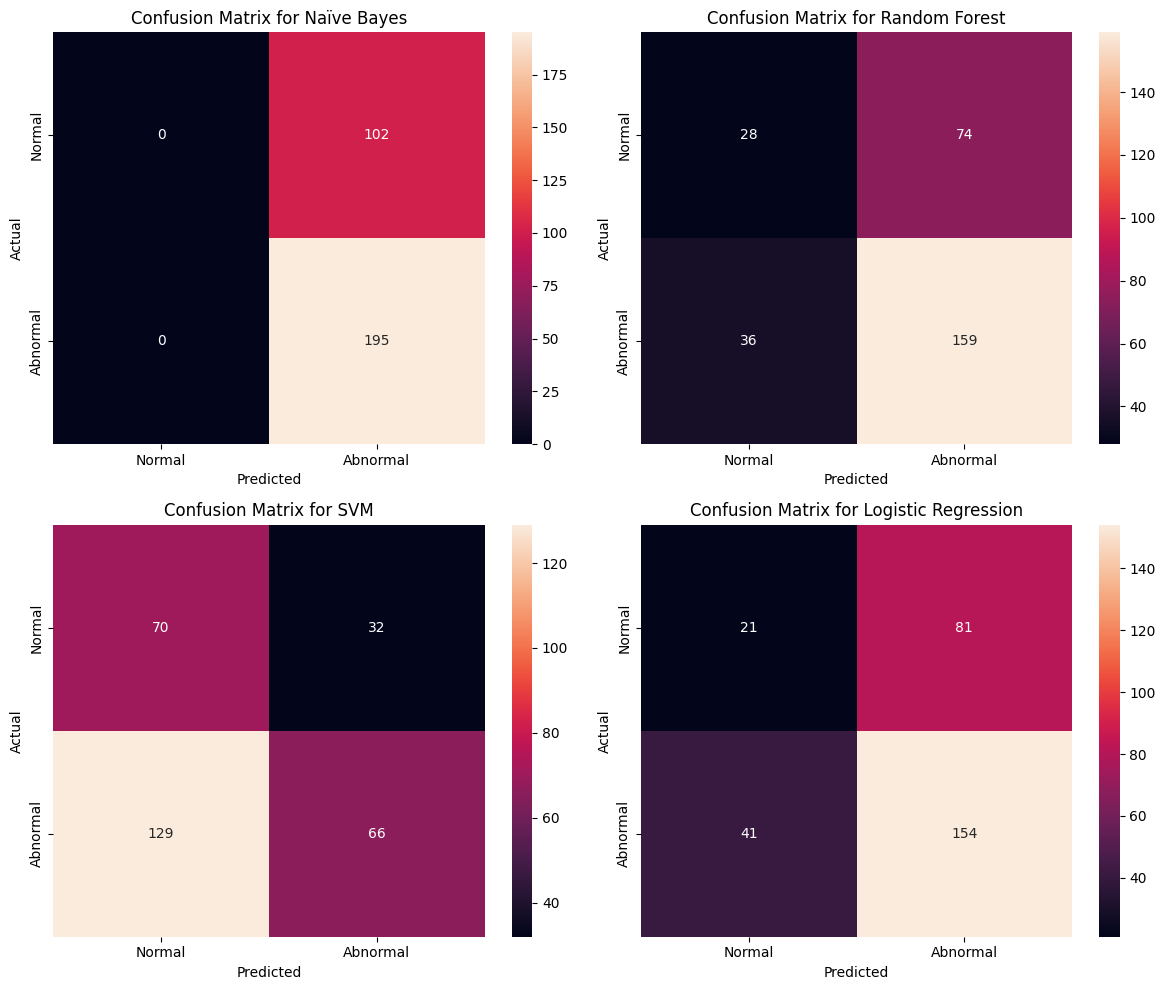

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# Assuming you have trained the models and assigned them to these variables:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_smote, y_train_smote)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)

svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_smote, y_train_smote)

# Dictionary of models
models = {
    "Naïve Bayes": naive_bayes_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "Logistic Regression": logistic_regression_model
}

plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)  # Predict using the model
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    plt.subplot(2, 2, i)  # Adjust grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=['Normal', 'Abnormal'],
                yticklabels=['Normal', 'Abnormal'])

    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
results

[0.5892255892255892,
 0.5151515151515151,
 0.6127946127946128,
 0.45791245791245794,
 0.6565656565656566]

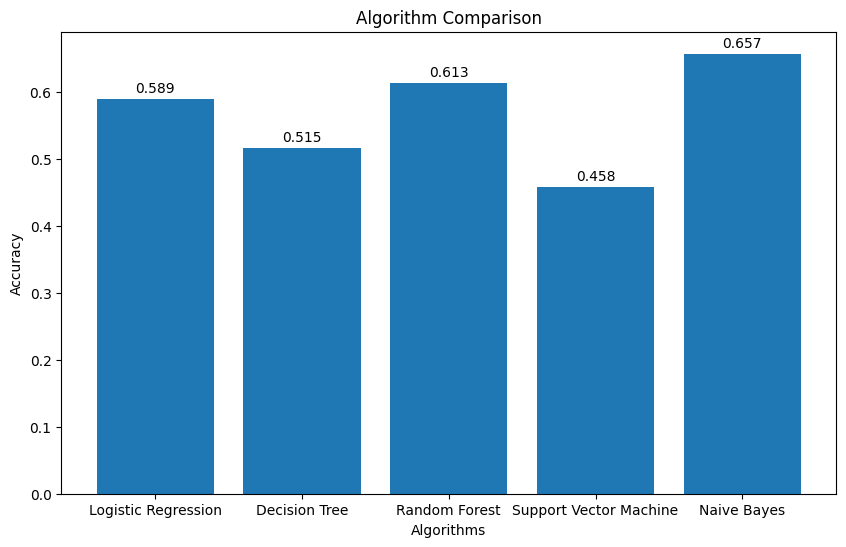

In [ ]:
# prompt: bar plot for algorithm comparison(accuracies of models) with labelling accuracy values

import matplotlib.pyplot as plt

# Assuming 'results' and 'names' are defined from the previous code
plt.figure(figsize=(10, 6))
plt.bar(names, results)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison")
for i, v in enumerate(results):
    plt.text(i, v + 0.01, str(round(v,3)), ha='center') #add accuracy values above bars
plt.show()
